In [27]:
import torch
import numpy as np
import pandas as pd
from os import listdir
import random
random.seed()   
import sklearn.mixture as mix
import talib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from hmmlearn import hmm
np.random.seed(42)


mypath = '/media/sweerts/Data/trading/cash_bot/data/'
extension = 'h5'
onlyfiles = [f for f in listdir(mypath) if f.endswith('.' + extension)]



bardata-28-11-2018.h5


/home/sweerts/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


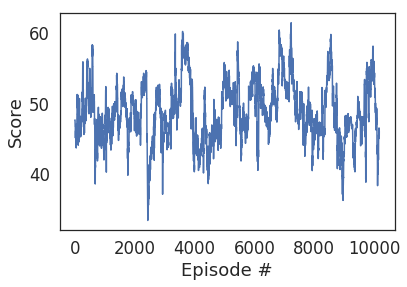

In [32]:
trainFile = random.choice(onlyfiles)
print(trainFile)
data = pd.read_hdf('/media/sweerts/Data/trading/cash_bot/data/' + trainFile, mode='r')
data['RSI'] = talib.RSI(data['close'],140).astype(float)
data['ADXR'] = talib.ADXR(data['high'],data['low'],data['close'],140).astype(float)
select = data.ix[:].dropna()
data = data.dropna()

# display(data)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(data['RSI'])), data['RSI'])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [33]:
# X =  data[['RSI','ADXR']].values
X =  data['RSI'].values.reshape(-1, 1)
print(X)
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model.fit(X)

[[47.61241918]
 [47.61241918]
 [47.61241918]
 ...
 [45.29726783]
 [45.29726783]
 [46.00854408]]


GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=2, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

/home/sweerts/anaconda3/envs/trading/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


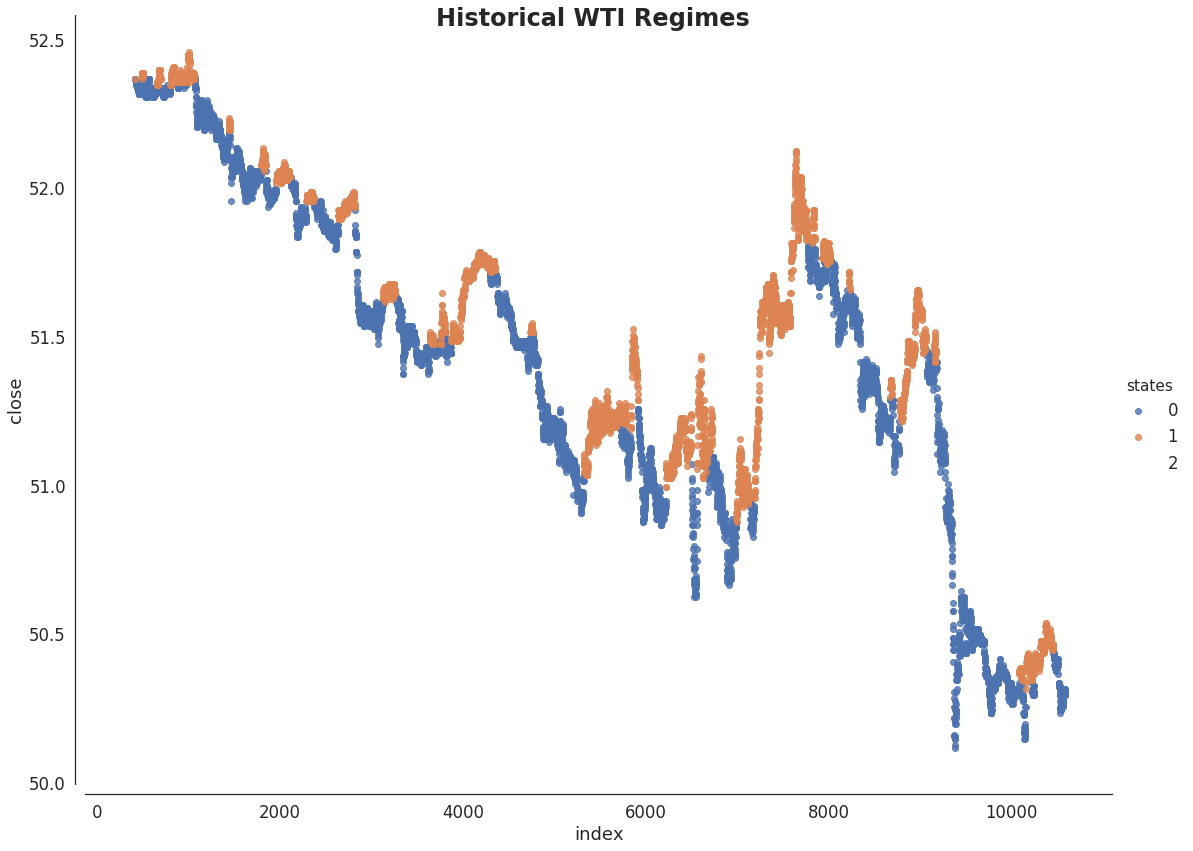

In [34]:
from sklearn.externals import joblib
model = joblib.load('HMM.pkl')

hidden_states = model.predict(X)
# print(hidden_states[:1000])
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
              'font.family':u'courier prime code', 'legend.frameon': True}
sns.set(font_scale=1.5)

states = (pd.DataFrame(hidden_states, columns=['states'], index=select.index)
          .join(select, how='inner')
          .reset_index(drop=False)
          )
# display(states)
sns.set_style('white', style_kwds)
order = [0, 1, 2]
# order = [0, 1]
fg = sns.FacetGrid(data=states, hue='states', hue_order=order,
                    aspect=1.31, size=12)
fg.map(plt.scatter, 'index', 'close', alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Historical WTI Regimes', fontsize=24, fontweight='demi')
fg.savefig('Hidden Markov (Mixture) Model_SPY Regimes.png')

In [26]:
for i in range(100):
    hidden_states = model.predict(np.array(range(100)).reshape(-1, 1))
    print(hidden_states)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1